# <h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:coral;border:20px;color:white'> **Technocolabs Internship Project - 2:**<h2>
# <h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:coral;border:20px;color:white'>**"Startup-Acquisition-Status-Modeling-Using-Machine-Learning-Pipeline"** <h2>
# <h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:coral;border:20px;color:white'>**Internee: Mr. Adil Ahmed Unar** <h2>
    


# **Task # 1: Data Preprocessing**

In [1]:
import numpy as np # Linear algebra
import pandas as pd # Data processing
from google.colab import drive # Using drive for dataset
import os # Paths to file

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_regression


# File Paths 📂:

In [2]:
drive.mount('/content/drive')

# Specify the path to your dataset folder
dataset_path = '/content/drive/MyDrive/Data_companies'

# List the files in the dataset folder
os.listdir(dataset_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['companies.csv']

In [3]:
#path for the training set
original_tr_df = "/content/drive/MyDrive/Data_companies/companies.csv"

# read in csv file as a DataFrame
comp_df = pd.read_csv(original_tr_df)
# explore the first 5 rows
comp_df.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [4]:
# @title summary statistics test
comp_df.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [5]:
# @title Column names
comp_df.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [6]:
# @title column information
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

## A. Data Cleaning
    1. Delete irrelevant & redundant information.
    2. Remove noise or unreliable data (missing values).

### 1. Delete irrelevant and redundant information
     a. Delete 'region','city','state_code' as they provide too much of granularity.
     b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at',
     'updated_at' as they are redundant.
     c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',
     'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',    
        'invested_companies' as they are irrelevant features.
     d. Delete duplicate values if any.
     e. Delete those which has more than 98% of null values.

### 2. Remove noise or unreliable data (missing values)
     a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.


In [7]:
# @title 1.a. Delete 'region', 'city', 'state_code' as they provide too much of granularity.

# Modifies the DataFrame in place and deleting the mentioned columns from dataset
comp_df.drop(['region','city','state_code'], axis=1, inplace=True)

In [8]:
# @title 1.b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

# Modifies the DataFrame in place and deleting the mentioned columns from dataset
comp_df.drop(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at', 'closed_at'], axis=1, inplace=True)

In [9]:
# @title 1.c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview', 'tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

# Modifies the DataFrame in place and deleting the mentioned columns from dataset
comp_df.drop(['domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description',
            'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink','invested_companies'], axis=1,inplace=True)

In [10]:
# @title 1.d. Delete duplicate values if found any

# Check for Duplicate values in dataset
comp_df.duplicated().sum()

87105

In [11]:
# Deleting all duplicating values from dataset
comp_df = comp_df.drop_duplicates()

In [12]:
# check if any left
comp_df.duplicated().sum()

0

In [13]:
# @title 1.e. Delete those which has more than 98% of null values.

# missing values in decsending order
print("Dataset \n")
print("In Numbers \n\n", comp_df.isnull().sum().sort_values(ascending=True),"\n" )
print("In Percentage % \n\n", comp_df.isnull().sum()/comp_df.shape[0]*100)

Dataset 

In Numbers 

 status                      0
category_code           12225
country_code            24854
founded_at              26899
lat                     28347
lng                     28347
relationships           34395
milestones              53340
last_milestone_at       53340
first_milestone_at      53340
funding_rounds          77779
last_funding_at         77978
first_funding_at        77978
funding_total_usd       81587
investment_rounds      107197
last_investment_at     107201
first_investment_at    107201
ROI                    108722
dtype: int64 

In Percentage % 

 category_code          11.169688
status                  0.000000
founded_at             24.576968
country_code           22.708501
first_investment_at    97.946970
last_investment_at     97.946970
investment_rounds      97.943316
first_funding_at       71.246619
last_funding_at        71.246619
funding_rounds         71.064798
funding_total_usd      74.544076
first_milestone_at     48.735473
last_m

In [14]:
# Deleting all those columns with more than 98% null values
comp_df.drop(columns=["ROI"], inplace=True)


2.a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
    
    (Since these are the type of data where adding value via imputation will create wrong pattern only)

In [15]:
# @title Drop instances with missing values in the specified columns

columns_to_check = ['status', 'country_code', 'category_code', 'founded_at']
comp_df.dropna(subset=columns_to_check, inplace=True)


In [16]:
# @title Drop the time-based columns from the DataFrame

# Define the list of time-based columns to drop because our task is not about the time series analysis
time_based_columns = ['first_investment_at', 'last_investment_at', 'first_funding_at', 'last_funding_at', 'first_milestone_at', 'last_milestone_at']
comp_df.drop(columns=time_based_columns, inplace=True)



In [17]:
# @title Imputing missing values using mean() method for this numerical data in dataset.

numerical_columns = ['investment_rounds', 'funding_rounds', 'funding_total_usd', 'milestones', 'relationships', 'lat', 'lng']
for col in numerical_columns:
    comp_df[col].fillna(comp_df[col].mean(), inplace=True)

comp_df.head()


,category_code,status,founded_at,country_code,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,2005-10-17,USA,4.75968,3.000000,3.975000e+07,5.000000,17.000000,47.606209,-122.332071
5,advertising,operating,2007-06-27,MAR,4.75968,1.805758,1.582132e+07,1.415929,2.000000,30.427755,-9.598107
6,cleantech,operating,2008-08-20,IND,4.75968,1.805758,1.582132e+07,1.415929,4.443607,22.307159,73.181219
12,advertising,operating,2008-08-01,USA,4.75968,1.805758,1.582132e+07,1.000000,2.000000,35.686975,-105.937799
13,web,acquired,2007-10-01,USA,4.75968,1.000000,5.000000e+06,3.000000,14.000000,37.386052,-122.083851


In [18]:
# @title Re - checking for null values

comp_df.isnull().sum()

category_code        0
status               0
founded_at           0
country_code         0
investment_rounds    0
funding_rounds       0
funding_total_usd    0
milestones           0
relationships        0
lat                  0
lng                  0
dtype: int64

In [19]:
# @title Concise summary information about the DataFrame

comp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63585 entries, 0 to 196552
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category_code      63585 non-null  object 
 1   status             63585 non-null  object 
 2   founded_at         63585 non-null  object 
 3   country_code       63585 non-null  object 
 4   investment_rounds  63585 non-null  float64
 5   funding_rounds     63585 non-null  float64
 6   funding_total_usd  63585 non-null  float64
 7   milestones         63585 non-null  float64
 8   relationships      63585 non-null  float64
 9   lat                63585 non-null  float64
 10  lng                63585 non-null  float64
dtypes: float64(7), object(4)
memory usage: 7.8+ MB


Now we have seen using the .info() method thet we have filled succesfully all mising the missing data.

# Task # 2: Exploratory Data Analysis (EDA) 📊:

    1. Univariate Analysis.
    2. Bivariate Analysis
    3. Multivariate Analysis

In [20]:
comp_df.head()

,category_code,status,founded_at,country_code,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,2005-10-17,USA,4.75968,3.000000,3.975000e+07,5.000000,17.000000,47.606209,-122.332071
5,advertising,operating,2007-06-27,MAR,4.75968,1.805758,1.582132e+07,1.415929,2.000000,30.427755,-9.598107
6,cleantech,operating,2008-08-20,IND,4.75968,1.805758,1.582132e+07,1.415929,4.443607,22.307159,73.181219
12,advertising,operating,2008-08-01,USA,4.75968,1.805758,1.582132e+07,1.000000,2.000000,35.686975,-105.937799
13,web,acquired,2007-10-01,USA,4.75968,1.000000,5.000000e+06,3.000000,14.000000,37.386052,-122.083851


# Univariate Analysis

In [21]:
# @title  Descriptive statistics for numerical columns in df

comp_df.describe()

,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
count,63585.000000,63585.000000,6.358500e+04,63585.000000,63585.000000,63585.000000,63585.000000
mean,4.759680,1.805758,1.582132e+07,1.415929,4.443607,37.294084,-50.715469
std,2.423232,0.786445,3.966092e+07,0.549882,11.563120,15.515049,69.444700
min,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.485278
25%,4.759680,1.805758,1.450000e+07,1.000000,2.000000,34.052234,-111.720761
50%,4.759680,1.805758,1.582132e+07,1.415929,3.000000,38.982228,-74.330084
75%,4.759680,1.805758,1.582132e+07,1.415929,4.443607,44.786568,0.121817
max,478.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.165130


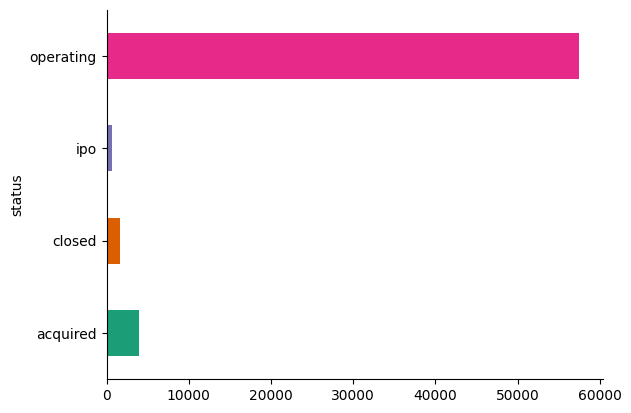

In [22]:
# @title Visualization of status - column (Target Variable)

from matplotlib import pyplot as plt
import seaborn as sns
comp_df.groupby('status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

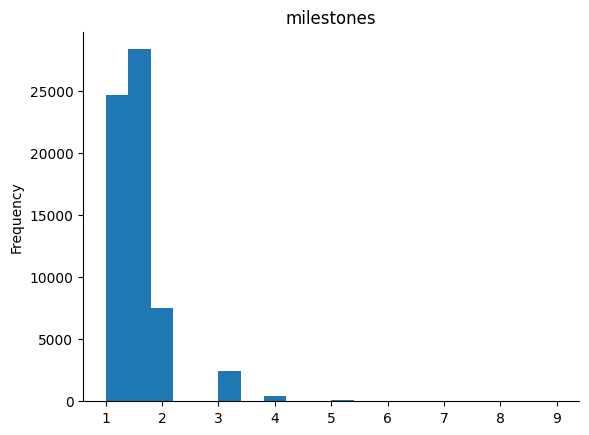

In [23]:
# @title Visualization of milestones - column

from matplotlib import pyplot as plt
comp_df['milestones'].plot(kind='hist', bins=20, title='milestones')
plt.gca().spines[['top', 'right',]].set_visible(False)

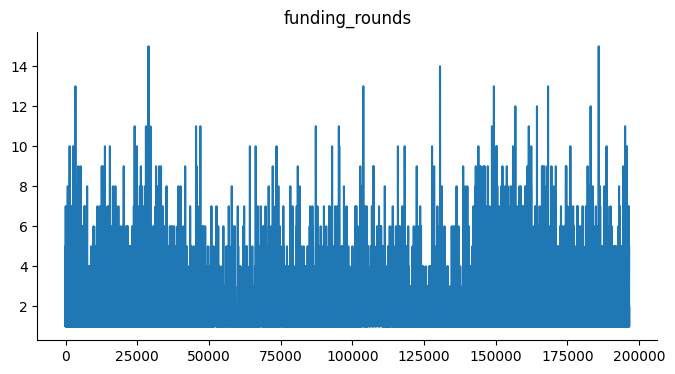

In [24]:
# @title Visualization of funding_rounds - column


from matplotlib import pyplot as plt
comp_df['funding_rounds'].plot(kind='line', figsize=(8, 4), title='funding_rounds')
plt.gca().spines[['top', 'right']].set_visible(False)

# Bivariate Analysis

<ipython-input-25-d302d0a81336>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=comp_df, x='milestones', y='status', inner='box', palette='Dark2')


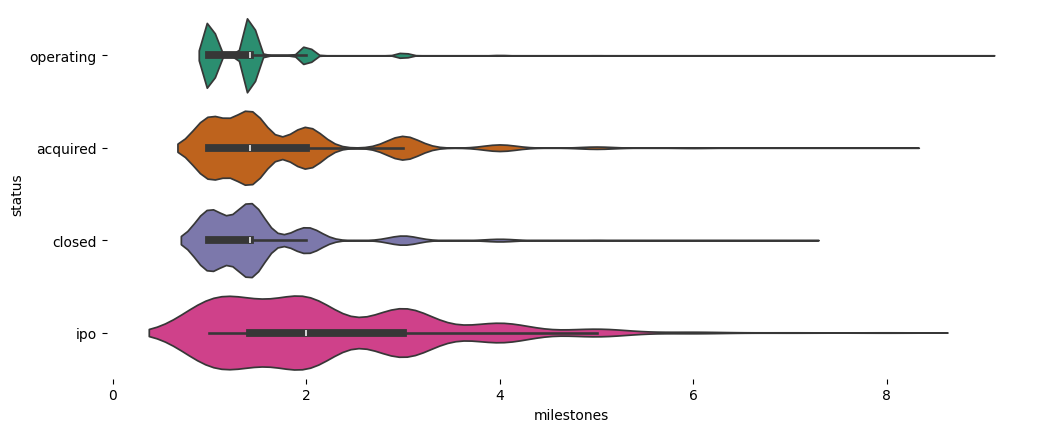

In [25]:
# @title Visalization of status vs milestones
figsize = (12, 1.2 * len(comp_df['status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data=comp_df, x='milestones', y='status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

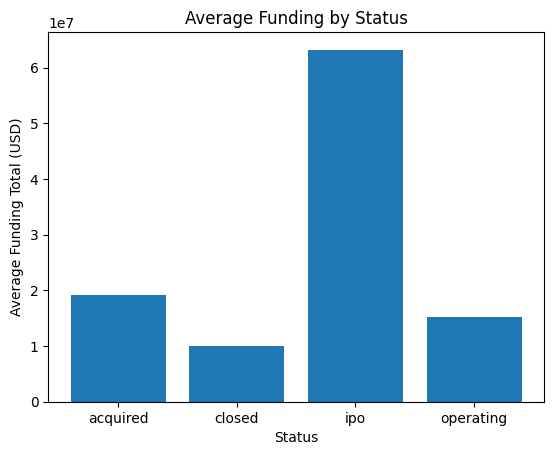

In [26]:
# @title Visualization of Avg Funding by Status
# Group the data by status and calculate the average funding total
grouped_data = comp_df.groupby('status')['funding_total_usd'].mean()

# Create a bar chart
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Status')
plt.ylabel('Average Funding Total (USD)')
_ = plt.title('Average Funding by Status')


<ipython-input-27-7caee851fcd4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(comp_df, x='funding_total_usd', y='status', inner='box', palette='Dark2')


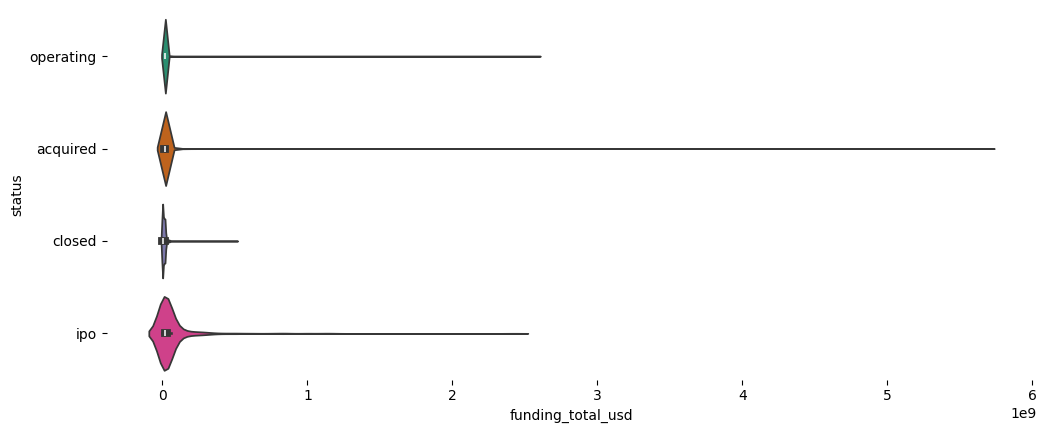

In [27]:
# @title Visualization of status vs funding_total_usd

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(comp_df['status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(comp_df, x='funding_total_usd', y='status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: xlabel='category_code'>

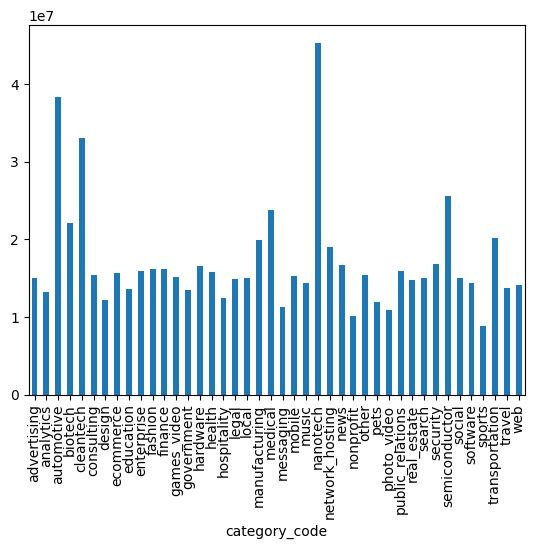

In [28]:
# @title Visualiztion of average_funding_amount by category_code

comp_df.groupby('category_code')['funding_total_usd'].mean().plot(kind='bar')

# Task # 3: Feature Engineering:

    1. Feature Selection
    2. Creation of New Features
    3. Normalization and Scaling:
    4. Encoding Categorical Variables
    5. Feature Engineering Documentation

In [29]:
comp_df.head()

,category_code,status,founded_at,country_code,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,2005-10-17,USA,4.75968,3.000000,3.975000e+07,5.000000,17.000000,47.606209,-122.332071
5,advertising,operating,2007-06-27,MAR,4.75968,1.805758,1.582132e+07,1.415929,2.000000,30.427755,-9.598107
6,cleantech,operating,2008-08-20,IND,4.75968,1.805758,1.582132e+07,1.415929,4.443607,22.307159,73.181219
12,advertising,operating,2008-08-01,USA,4.75968,1.805758,1.582132e+07,1.000000,2.000000,35.686975,-105.937799
13,web,acquired,2007-10-01,USA,4.75968,1.000000,5.000000e+06,3.000000,14.000000,37.386052,-122.083851


In [30]:
rows, columns = comp_df.shape

print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 63585
Number of columns: 11


In [31]:
# @title  creation of new features from dataset

# Convert 'founded_at' column to datetime format
comp_df['founded_at'] = pd.to_datetime(comp_df['founded_at'])

# Extract year from 'founded_at' column
comp_df['founded_at'] = comp_df['founded_at'].dt.year

comp_df.head()

,category_code,status,founded_at,country_code,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,2005,USA,4.75968,3.000000,3.975000e+07,5.000000,17.000000,47.606209,-122.332071
5,advertising,operating,2007,MAR,4.75968,1.805758,1.582132e+07,1.415929,2.000000,30.427755,-9.598107
6,cleantech,operating,2008,IND,4.75968,1.805758,1.582132e+07,1.415929,4.443607,22.307159,73.181219
12,advertising,operating,2008,USA,4.75968,1.805758,1.582132e+07,1.000000,2.000000,35.686975,-105.937799
13,web,acquired,2007,USA,4.75968,1.000000,5.000000e+06,3.000000,14.000000,37.386052,-122.083851


In [32]:
# Create a dictionary to map status values to isClosed values
status_mapping = {'operating': 1, 'ipo': 1, 'acquired': 0, 'closed': 0}

# Map status values to isClosed values and create the new column
comp_df['isClosed'] = comp_df['status'].map(status_mapping)

# Display the updated DataFrame
comp_df.head()


,category_code,status,founded_at,country_code,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed
0,web,operating,2005,USA,4.75968,3.000000,3.975000e+07,5.000000,17.000000,47.606209,-122.332071,1
5,advertising,operating,2007,MAR,4.75968,1.805758,1.582132e+07,1.415929,2.000000,30.427755,-9.598107,1
6,cleantech,operating,2008,IND,4.75968,1.805758,1.582132e+07,1.415929,4.443607,22.307159,73.181219,1
12,advertising,operating,2008,USA,4.75968,1.805758,1.582132e+07,1.000000,2.000000,35.686975,-105.937799,1
13,web,acquired,2007,USA,4.75968,1.000000,5.000000e+06,3.000000,14.000000,37.386052,-122.083851,0


In [33]:
# @title normalization (min-max Scaling)


# Select the numerical features for normalization
numerical_features = ['investment_rounds', 'funding_rounds', 'funding_total_usd',
                      'milestones', 'relationships', 'lat', 'lng']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform Min-Max scaling on the selected features
comp_df[numerical_features] = scaler.fit_transform(comp_df[numerical_features])

comp_df.head()


,category_code,status,founded_at,country_code,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed
0,web,operating,2005,USA,0.007882,0.142857,0.006974,0.500000,0.013468,0.766939,0.110690,1
5,advertising,operating,2007,MAR,0.007882,0.057554,0.002776,0.051991,0.000842,0.633250,0.446557,1
6,cleantech,operating,2008,IND,0.007882,0.057554,0.002776,0.051991,0.002899,0.570053,0.693181,1
12,advertising,operating,2008,USA,0.007882,0.057554,0.002776,0.000000,0.000842,0.674179,0.159533,1
13,web,acquired,2007,USA,0.007882,0.000000,0.000877,0.250000,0.010943,0.687402,0.111430,0


## Encoding Categorical Variables
    1. All Ordinal variables will be Label encoded - Order matter.
    2. All Nominal variables will be One Hot encoded - Order does not matter.
    

In [34]:
# @title One-Hot Encoding - Country_Code Column

num_countries = comp_df['country_code'].nunique()
print("Number of unique countries:", num_countries)


Number of unique countries: 165


In [35]:
# First, replace country codes not in the top 10 with 'Other'
top_countries = comp_df['country_code'].value_counts().head(10).index.tolist()
comp_df['country_code'] = comp_df['country_code'].apply(lambda x: x if x in top_countries else 'Other')

# Perform one-hot encoding for 'country_code'
comp_df = pd.get_dummies(comp_df, columns=['country_code'], prefix='country')


In [36]:
comp_df.columns

Index(['category_code', 'status', 'founded_at', 'investment_rounds',
       'funding_rounds', 'funding_total_usd', 'milestones', 'relationships',
       'lat', 'lng', 'isClosed', 'country_AUS', 'country_CAN', 'country_DEU',
       'country_ESP', 'country_FRA', 'country_GBR', 'country_IND',
       'country_ISR', 'country_NLD', 'country_Other', 'country_USA'],
      dtype='object')

In [37]:
# @title One-Hot Encoding - Category_Code Column

# there are only 11 unique categories in the category_code , let's apply direct one hot encode technique on
num_categories = comp_df['category_code'].nunique()
print("Number of unique categories:", num_categories)


Number of unique categories: 42


In [38]:
# Since there are 42 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 10 values and name

# First, replace category codes not in the top 10 with 'Other'
top_categories = comp_df['category_code'].value_counts().head(10).index.tolist()
comp_df['category_code'] = comp_df['category_code'].apply(lambda x: x if x in top_categories else 'Other')

# Perform one-hot encoding for 'category_code'
comp_df = pd.get_dummies(comp_df, columns=['category_code'], prefix='category')


In [39]:
comp_df.columns

Index(['status', 'founded_at', 'investment_rounds', 'funding_rounds',
       'funding_total_usd', 'milestones', 'relationships', 'lat', 'lng',
       'isClosed', 'country_AUS', 'country_CAN', 'country_DEU', 'country_ESP',
       'country_FRA', 'country_GBR', 'country_IND', 'country_ISR',
       'country_NLD', 'country_Other', 'country_USA', 'category_Other',
       'category_advertising', 'category_biotech', 'category_consulting',
       'category_ecommerce', 'category_enterprise', 'category_games_video',
       'category_mobile', 'category_other', 'category_software',
       'category_web'],
      dtype='object')

In [40]:
# @title Label Endoded - Status Column

num_status = comp_df['status'].nunique()
print("Number of unique status:", num_status)

Number of unique status: 4


In [41]:
# Define the mapping
status_mapping = { 'operating': 1, 'acquired': 2, 'closed': 3, 'ipo': 4 }

# Map the status values to numerical values and update the 'status' column
comp_df['status'] = comp_df['status'].map(status_mapping)



In [42]:
comp_df.head()

,status,founded_at,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed,...,category_advertising,category_biotech,category_consulting,category_ecommerce,category_enterprise,category_games_video,category_mobile,category_other,category_software,category_web
0,1,2005,0.007882,0.142857,0.006974,0.500000,0.013468,0.766939,0.110690,1,...,0,0,0,0,0,0,0,0,0,1
5,1,2007,0.007882,0.057554,0.002776,0.051991,0.000842,0.633250,0.446557,1,...,1,0,0,0,0,0,0,0,0,0
6,1,2008,0.007882,0.057554,0.002776,0.051991,0.002899,0.570053,0.693181,1,...,0,0,0,0,0,0,0,0,0,0
12,1,2008,0.007882,0.057554,0.002776,0.000000,0.000842,0.674179,0.159533,1,...,1,0,0,0,0,0,0,0,0,0
13,2,2007,0.007882,0.000000,0.000877,0.250000,0.010943,0.687402,0.111430,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
# @title Feature Selection using Mutual Information (MI)

# Extract the target variable (Y)
y = comp_df['status']  # Replace 'target_column_name' with the name of your target column

# Drop the target variable from the DataFrame to get the feature matrix (X)
X = comp_df.drop(columns=['status'])  # Replace 'target_column_name' with the name of your target column

# Compute mutual information between features and target
mi_scores = mutual_info_regression(X, y)

# Create a DataFrame to store feature names and their mutual information scores
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

# Sort features based on mutual information scores (descending order)
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Display the top-ranked features
print(mi_scores_df.head(10))

# Reset the index of X_df and y_df
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Concatenate X_df and y_df along the rows axis
comp_df = pd.concat([X, y], axis=1)


              Feature  MI Score
8            isClosed  0.294333
0          founded_at  0.036803
5       relationships  0.031583
3   funding_total_usd  0.022163
2      funding_rounds  0.021684
6                 lat  0.020774
7                 lng  0.016215
4          milestones  0.013123
19        country_USA  0.009254
20     category_Other  0.006944


# **Feature Engineering Documentation** 📑

## Results of Feature Engineering:

The summary of the feature engineering (FE) steps and their effects on the dataset is quite comprehensive. As `Comp_df` has 11 coulumns (3 columns are categorical + 8 are numerical) and 63585 rows but after FE there was increased in columns with adding more valuable column in df.

**1. Feature Creation and Transformation:**
* A new column isClosed has been introduced to provide a clear distinction between operating and closed entities, derived from the status column via mapping.
* Additionally, the datetime column has been transformed into years, enhancing the interpretability and clarity of temporal information within the dataset.

**2. Normalization:**
* Applied `normalization (min-max)` scaling on df, to establish uniformity and prevent biases, normalization in the form of min-max scaling has been applied across all features. This ensures that no individual feature unduly influences the model due to variations in scale.

**3. Categorical Variable Handling:**
* In order to deal the `Categorical Variables`, I applied these two techniques in FE:
    1. Nominal variables, such as country_code and category_code, have been appropriately encoded using one-hot encoding, ensuring compatibility with machine learning algorithms.
    2. Ordinal variables, exemplified by status_code, have been encoded using label encoding to preserve their inherent order and significance.

**4. Mutual Information Analysis:**
* `Mutual Information (MI)` analysis has been conducted to quantify the relationship between each feature and the target variable. This step aids in identifying the most influential features for predictive modeling.

       *   The higher value, the closer connection between this feature and the target.
       *   The lowe value, the weaker connection between this feature and the target.

        Note! The relationship can be observed from above cell.

## Conclusion

After conducting comprehensive feature engineering, my dataset Comp_df has undergone significant transformations. Initially containing 11 columns consisting of 3 categorical variables and 8 numerical variables, it has now expanded to encompass 32 columns while maintaining its original 63585 rows. All variables within Comp_df have been converted to numerical format, making them suitable for analytical operations. My df is ready to embark on the next phase of model construction with confidence

Thank you! 😀